In [113]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv('data.csv')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [116]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [117]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


Based on the information presented above, we can see that the count for duration, pulse and maxpulse are all 169 except for calories which has 164.
This tells us that there are missing values present in the column of calories.

From the observation as well, we can see that only 5 columns do not have data.
We can either remove the rows with missing data or fill with the average of the column.
It is usually advisable to fill the missing data with the average because you do not want to look too much information.

But in this case, I am just going to remove the rows with missing data since it is just 5.

In [118]:
data.dropna(inplace=True)

In [119]:
data.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.160661,0.005679,0.922717
Pulse,-0.160661,1.000000,0.784631,0.025121
Maxpulse,0.005679,0.784631,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


From the correlation table above, we can see that there is good correlation between Duration and Calories, which means that the more an individual works out, the probability of burning more calories is high.

Now, we are going to see how to predict the calories burnt based on our exercise duration, pulse and maxpulse

In [120]:
y = data['Calories']
y = np.array(y)

In [121]:
X = data[['Duration', 'Pulse', 'Maxpulse']]
X = np.array(X)

I am going to train the data but I also want an accuracy which is greater than 0.9 hence I will use a while to check this

In [122]:
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    if model.score(X_test, y_test) > 0.9:
        print("Accuracy score", model.score(X_test, y_test))
        break

Accuracy score 0.9550009804532518


In [123]:
predictions = model.predict(X_test)

I am going to print out the first 10 predictions made by our LinearRegression model

In [124]:
for i in range(len(predictions)):
    if i < 10:
        string = f"Model predicts that if you work out for {X_train[i][0]}mins at a Pulse of {X_train[i][1]}"
        string += f" and Maxpluse of {X_train[i][2]}, you may burn {round(predictions[i], 2)} calories.\n"
        string += f"Data shows that the actual calories burnt was {y_test[i]} \n"
        print(string)

Model predicts that if you work out for 60mins at a Pulse of 103 and Maxpluse of 133, you may burn 376.89 calories.
Data shows that the actual calories burnt was 443.0 

Model predicts that if you work out for 60mins at a Pulse of 97 and Maxpluse of 122, you may burn 270.06 calories.
Data shows that the actual calories burnt was 234.0 

Model predicts that if you work out for 60mins at a Pulse of 112 and Maxpluse of 146, you may burn 236.1 calories.
Data shows that the actual calories burnt was 275.0 

Model predicts that if you work out for 150mins at a Pulse of 97 and Maxpluse of 129, you may burn 1522.65 calories.
Data shows that the actual calories burnt was 1729.0 

Model predicts that if you work out for 20mins at a Pulse of 110 and Maxpluse of 130, you may burn 919.04 calories.
Data shows that the actual calories burnt was 853.0 

Model predicts that if you work out for 45mins at a Pulse of 90 and Maxpluse of 112, you may burn 343.97 calories.
Data shows that the actual calories

Now, I will plot a scatter graph for Duration and calories

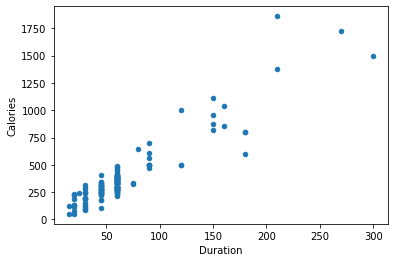

In [125]:
data.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
plt.show()

From the graph, we can see that the more time an individual spent on working out, the more calories they burn.
Individuals working from 200 minutes to 300 minutes are burning more calories than those working less or close to 50 mins